In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

import os, sys
sys.path.append('../code')

from retina2 import *

/home/oalenkin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import warnings
warnings.filterwarnings('ignore')

# reading data

In [3]:
data = pd.read_csv('../data/hits.csv', index_col=0)

# demonstration of z_distance

In [4]:
real = []
exp = []
for event_i in set(data.EventID.values):
    event = data[data.EventID==event_i]
    track1 = event[(event.TrackID==2)&(event.StatNb<3)]
    track_params = get_track_params(track1, 2)
    for i in range(len(track1)):
        start, direction, z0 = ends2params(track1[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i])
        exp.append(z_distance(track_params, z0, start, direction))
        real.append(track1.dist2Wire.values[i])
        
    track2 = event[(event.TrackID==3)&(event.StatNb<3)]
    track_params = get_track_params(track2, 3)
    for i in range(len(track2)):
        start, direction, z0 = ends2params(track2[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values[i])
        exp.append(z_distance(track_params, z0, start, direction))
        real.append(track2.dist2Wire.values[i])

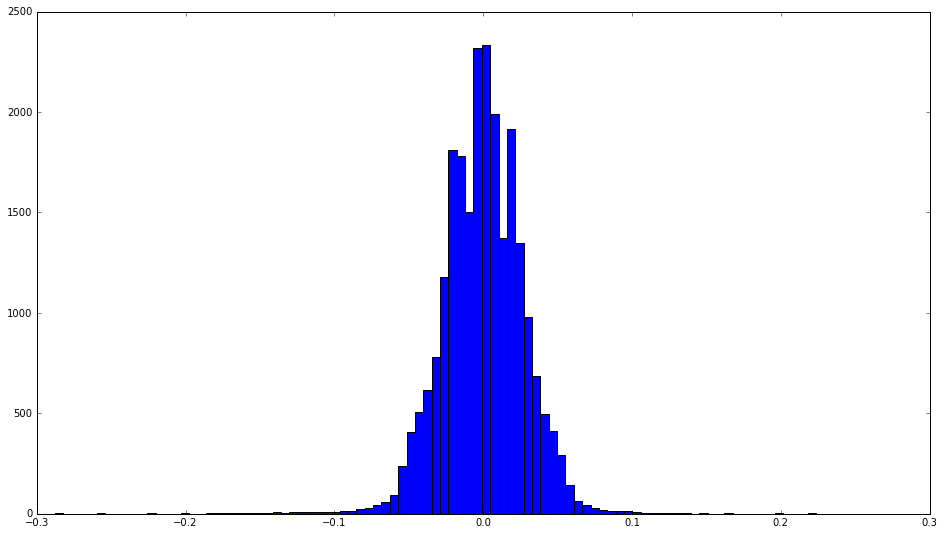

In [5]:
plt.figure(figsize=(16,9))
hist_arr = plt.hist(np.array(real)-np.array(exp), bins=100)

# choose event

In [4]:
event = data[data.EventID==2]
event_before_magnet = event[event.StatNb<3]

# how to use artifitial_retina_response()

In [11]:
artifitial_retina_response(track1, event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)

33.478392853088529

In [12]:
artifitial_retina_response([4.25461110e+01, 1.03470809e-02, 3.03522450e+00, -2.16322858e-04], event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, 10)


34.489868472054013

# 2D projections

In [5]:
size = 20
ms = np.linspace(-0.1, 0.1, size)
y0s = np.linspace(-500, 500, size)
ls = np.linspace(-0.1, 0.1, size)
x0s = np.linspace(-250, 250, size)

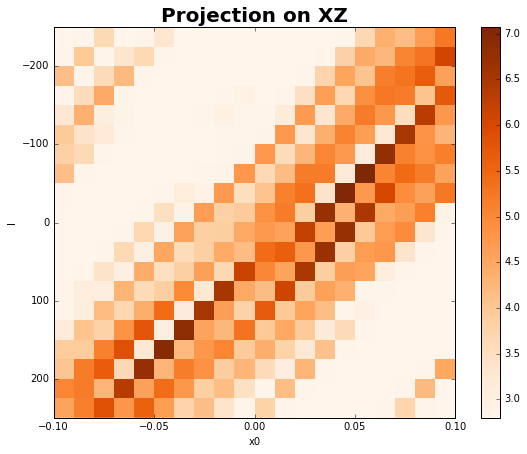

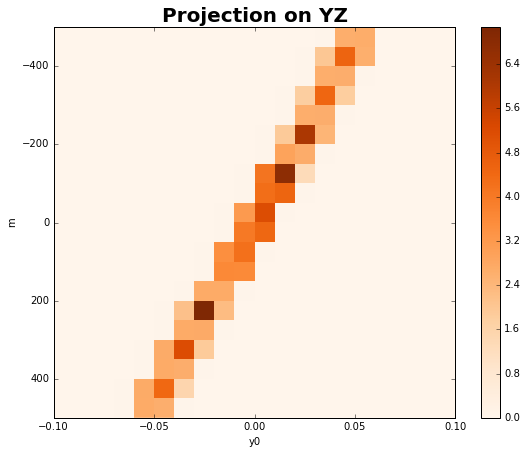

In [6]:
projections = plot_artifitial_retina_response(event_before_magnet, [x0s, ls, y0s, ms], 1)

In [5]:
track1 = get_track_params(event_before_magnet, 2)
track1

[43.76241890491,
 0.011467342483359991,
 6.0624280360975797,
 -0.0020229836340624773]

In [6]:
track2 = get_track_params(event_before_magnet, 3)
track2

[88.338425296568971,
 -0.0092683439167328685,
 -12.820928680230884,
 0.006479333198265858]

# track finding

In [5]:
retina = RetinaTrackReconstruction()

In [6]:
array_of_initial_parameters = []
for i in np.linspace(-500, 500, 1):
    array_of_initial_parameters.append([0, 0, i, 0])
array_of_initial_parameters = np.array(array_of_initial_parameters)

In [18]:
dots_array = retina.fit(event_before_magnet[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, \
                        array_of_initial_parameters)

In [10]:
retina.R(dots_array[0][8])

-0.0

In [11]:
dots_array[0][-1]

array([  2.06555194e+01,   1.73288288e-02,  -5.37786064e+01,
         2.10449294e-02])

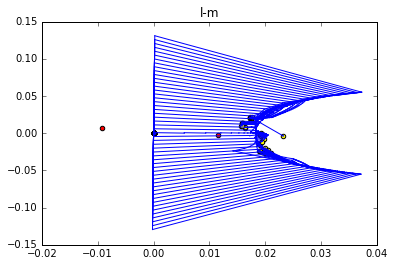

In [12]:
for dots in dots_array:
    plt.scatter(dots[0][1], dots[0][3], c='blue')
    plt.scatter(dots[-1][1], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][1], dots[j+1][1]], [dots[j][3], dots[j+1][3]], c='blue')

plt.scatter(track1[1], track1[3], c='red')
plt.scatter(track2[1], track2[3], c='red')
plt.title('l-m')

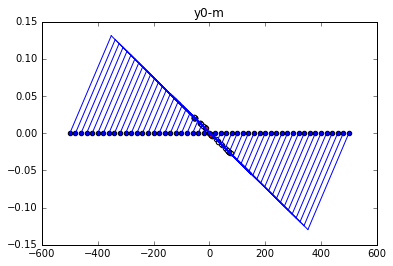

In [13]:
for dots in dots_array:
    plt.scatter(dots[0][2], dots[0][3], c='blue')
    plt.scatter(dots[-1][2], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][2], dots[j+1][2]], [dots[j][3], dots[j+1][3]], c='blue')
        
plt.scatter(track1[2], track1[3], c='red')
plt.scatter(track2[2], track2[3], c='red')
plt.title('y0-m')

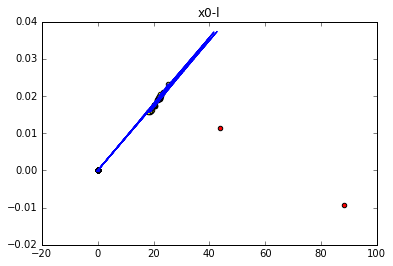

In [14]:
for dots in dots_array:
    plt.scatter(dots[0][0], dots[0][1], c='blue')
    plt.scatter(dots[-1][0], dots[-1][1], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][1], dots[j+1][1]], c='blue')
        
plt.scatter(track1[0], track1[1], c='red')
plt.scatter(track2[0], track2[1], c='red')
plt.title('x0-l')

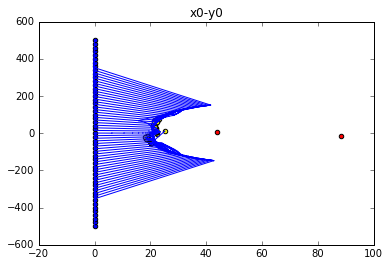

In [15]:
for dots in dots_array:
    plt.scatter(dots[0][0], dots[0][2], c='blue')
    plt.scatter(dots[-1][0], dots[-1][2], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][2], dots[j+1][2]], c='blue')
        
plt.scatter(track1[0], track1[2], c='red')
plt.scatter(track2[0], track2[2], c='red')
plt.title('x0-y0')

# artifitial test

choose two pairs of crossed lines drom one track

In [5]:
art_event = event[(event.index==81)|(event.index==83)|(event.index==91)|(event.index==95)]
art_event

,EventID,TrackID,PdgCode,DetectorID,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,Px,...,Z,dist2Wire,Wx1,Wx2,Wy1,Wy2,Wz,Wz1,Wz2,Label
81,2,2.0,-211.0,11012288.0,1,1,0,1,288,0.866625,...,2592.249023,0.310706,-248.587499,249.509850,-27.060200,16.517671,2592.3793,2592.3793,2592.3793,0.0
83,2,2.0,-211.0,12012281.0,1,2,0,1,281,0.866803,...,2602.250244,0.170734,-248.436092,249.661257,28.790790,-14.787082,2602.3793,2602.3793,2602.3793,0.0
91,2,2.0,-211.0,21102288.0,2,1,1,0,288,0.866668,...,2793.751221,0.403879,-248.472453,249.624896,-28.375177,15.202694,2793.8793,2793.8793,2793.8793,0.0
95,2,2.0,-211.0,22112281.0,2,2,1,1,281,0.867310,...,2804.850586,0.402276,-248.474440,249.622909,28.352464,-15.225407,2804.9793,2804.9793,2804.9793,0.0


parameters of track:

In [6]:
track1 = get_track_params(art_event, 2)
x0, l, y0, m = track1
track1

[43.762730911777197,
 0.011467221323231743,
 6.0666341426410622,
 -0.0020246503215032184]

In [7]:
size = 20
ms = np.linspace(-0.003, -0.001, size)
y0s = np.linspace(5, 7, size)
ls = np.linspace(0.005, 0.02, size)
x0s = np.linspace(40, 46, size)

# Real maximum

x0: 43.7627309118
y0: 6.06663414264


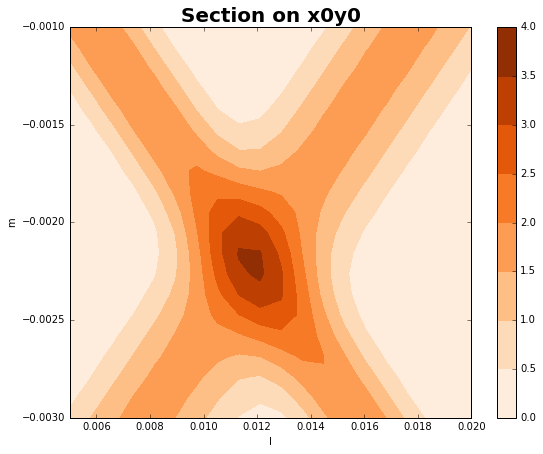

In [8]:
print "x0:", x0
print "y0:", y0
sigma = 0.8
section_x0y0 = np.ndarray(shape=(len(ls), len(ms)))
for j in range(len(ls)):
    for t in range(len(ms)):
        section_x0y0[j, t] = artifitial_retina_response([x0, ls[j], y0, ms[t]], \
                                                        art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on x0y0", fontsize=20, fontweight='bold')
_ = plt.contourf(ls, ms, section_x0y0, cmap=plt.cm.Oranges)
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar()

l: 0.0114672213232
m: -0.0020246503215


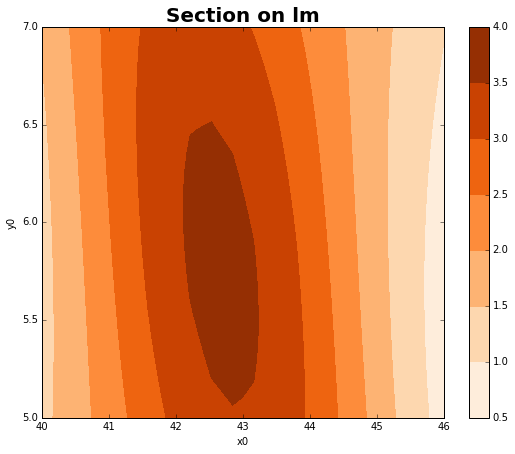

In [9]:
print "l:", l
print "m:", m
sigma = 0.8
section_lm = np.ndarray(shape=(len(x0s), len(y0s)))
for j in range(len(x0s)):
    for t in range(len(y0s)):
        section_lm[j, t] = artifitial_retina_response([x0s[j], l, y0s[t], m], \
                                                      art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on lm", fontsize=20, fontweight='bold')
_ = plt.contourf(x0s, y0s, section_lm, cmap=plt.cm.Oranges)
plt.xlabel("x0")
plt.ylabel("y0")
plt.colorbar()

x0: 43.7627309118
l: 0.0114672213232


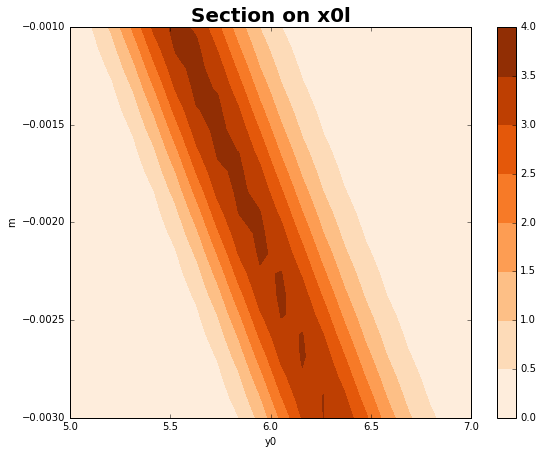

In [10]:
print "x0:", x0
print "l:", l
sigma = 0.8
section_x0l = np.ndarray(shape=(len(y0s), len(ms)))
for j in range(len(y0s)):
    for t in range(len(ms)):
        section_x0l[j, t] = artifitial_retina_response([x0, l, y0s[j], ms[t]], \
                                                      art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on x0l", fontsize=20, fontweight='bold')
_ = plt.contourf(y0s, ms, section_x0l, cmap=plt.cm.Oranges)
plt.xlabel("y0")
plt.ylabel("m")
plt.colorbar()

y0: 6.06663414264
m: -0.0020246503215


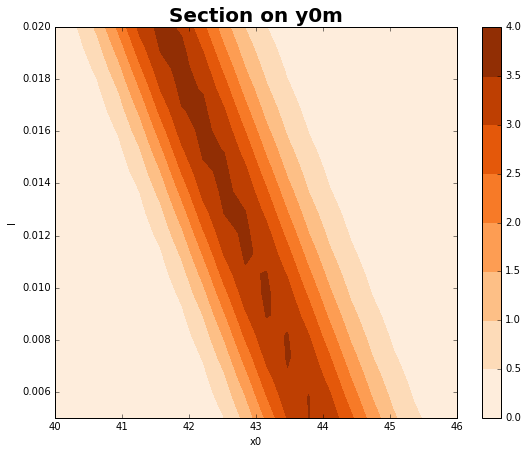

In [11]:
print "y0:", y0
print "m:", m
sigma = 0.8
section_y0m = np.ndarray(shape=(len(x0s), len(ls)))
for j in range(len(x0s)):
    for t in range(len(ls)):
        section_y0m[j, t] = artifitial_retina_response([x0s[j], ls[t], y0, m], \
                                                      art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on y0m", fontsize=20, fontweight='bold')
_ = plt.contourf(x0s, ls, section_x0l, cmap=plt.cm.Oranges)
plt.xlabel("x0")
plt.ylabel("l")
plt.colorbar()

In [8]:
array_of_initial_parameters = []
for i in np.linspace(-100, 100, 5):
    for j in np.linspace(-50, 50, 5):
        array_of_initial_parameters.append([j, 0, i, 0])
array_of_initial_parameters = np.array(array_of_initial_parameters)

In [9]:
retina = RetinaTrackReconstruction()

In [10]:
new_dots_array = retina.fit(art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, \
                        array_of_initial_parameters)

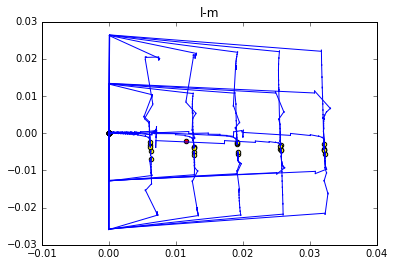

In [11]:
for dots in new_dots_array:
    plt.scatter(dots[0][1], dots[0][3], c='blue')
    plt.scatter(dots[-1][1], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][1], dots[j+1][1]], [dots[j][3], dots[j+1][3]], c='blue')

plt.scatter(track1[1], track1[3], c='red')
plt.title('l-m')

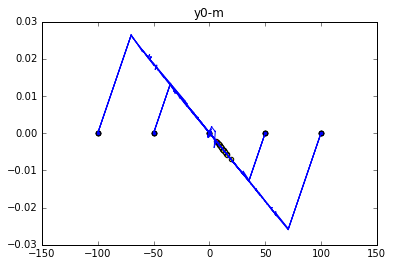

In [12]:
for dots in new_dots_array:
    plt.scatter(dots[0][2], dots[0][3], c='blue')
    plt.scatter(dots[-1][2], dots[-1][3], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][2], dots[j+1][2]], [dots[j][3], dots[j+1][3]], c='blue')
        
plt.scatter(track1[2], track1[3], c='red')
plt.title('y0-m')

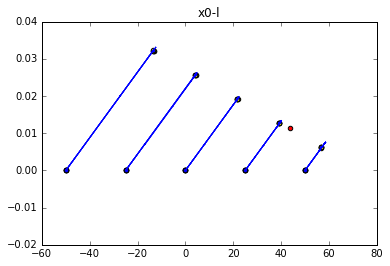

In [13]:
for dots in new_dots_array:
    plt.scatter(dots[0][0], dots[0][1], c='blue')
    plt.scatter(dots[-1][0], dots[-1][1], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][1], dots[j+1][1]], c='blue')
        
plt.scatter(track1[0], track1[1], c='red')
plt.title('x0-l')

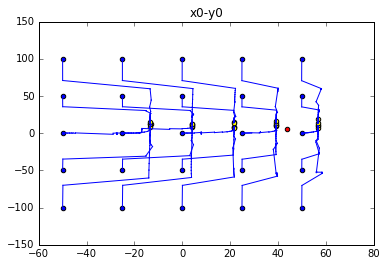

In [14]:
for dots in new_dots_array:
    plt.scatter(dots[0][0], dots[0][2], c='blue')
    plt.scatter(dots[-1][0], dots[-1][2], c='yellow')
    for j in range(len(dots)-1):
        plt.plot([dots[j][0], dots[j+1][0]], [dots[j][2], dots[j+1][2]], c='blue')
        
plt.scatter(track1[0], track1[2], c='red')
plt.title('x0-y0')

# Founded maximum

In [32]:
x0, l, y0, m = new_dots_array[0][-1]

In [33]:
new_dots_array[0][-1]

array([ -1.31214469e+01,   3.20814444e-02,   1.22789833e+01,
        -4.39683047e-03])

In [34]:
sigma = 0.8

In [35]:
size = 20
ms = np.linspace(-0.005, -0.004, size)
y0s = np.linspace(12, 13, size)
ls = np.linspace(0.03, 0.04, size)
x0s = np.linspace(-14, -13, size)

x0: -13.1214468618
y0: 12.2789833201


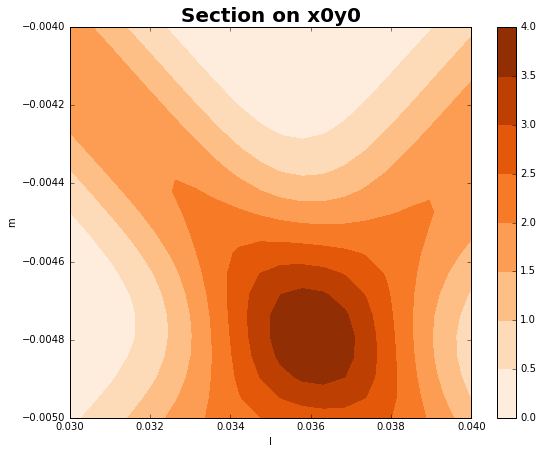

In [36]:
print "x0:", x0
print "y0:", y0
section_x0y0 = np.ndarray(shape=(len(ls), len(ms)))
for j in range(len(ls)):
    for t in range(len(ms)):
        section_x0y0[j, t] = artifitial_retina_response([x0, ls[j], y0, ms[t]], \
                                                        art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on x0y0", fontsize=20, fontweight='bold')
_ = plt.contourf(ls, ms, section_x0y0, cmap=plt.cm.Oranges)
plt.xlabel("l")
plt.ylabel("m")
plt.colorbar()

l: 0.0320814443744
m: -0.00439683047201


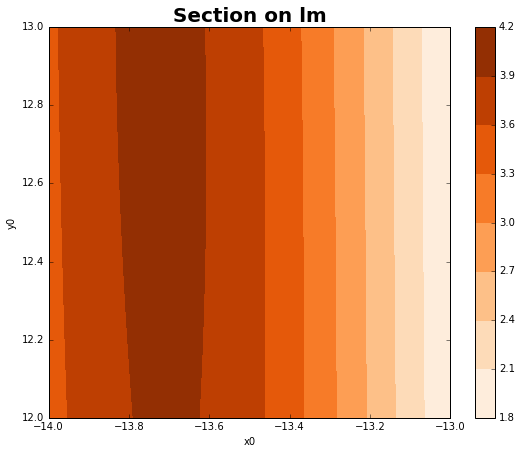

In [37]:
print "l:", l
print "m:", m
section_lm = np.ndarray(shape=(len(x0s), len(y0s)))
for j in range(len(x0s)):
    for t in range(len(y0s)):
        section_lm[j, t] = artifitial_retina_response([x0s[j], l, y0s[t], m], \
                                                      art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on lm", fontsize=20, fontweight='bold')
_ = plt.contourf(x0s, y0s, section_lm, cmap=plt.cm.Oranges)
plt.xlabel("x0")
plt.ylabel("y0")
plt.colorbar()

x0: -13.1214468618
l: 0.0320814443744


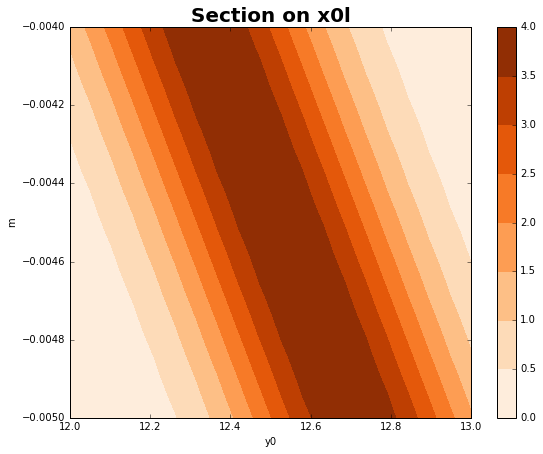

In [38]:
print "x0:", x0
print "l:", l
section_x0l = np.ndarray(shape=(len(y0s), len(ms)))
for j in range(len(y0s)):
    for t in range(len(ms)):
        section_x0l[j, t] = artifitial_retina_response([x0, l, y0s[j], ms[t]], \
                                                      art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on x0l", fontsize=20, fontweight='bold')
_ = plt.contourf(y0s, ms, section_x0l, cmap=plt.cm.Oranges)
plt.xlabel("y0")
plt.ylabel("m")
plt.colorbar()

y0: 12.2789833201
m: -0.00439683047201


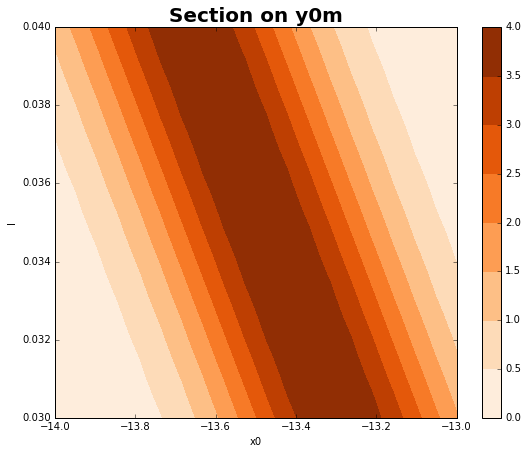

In [39]:
print "y0:", y0
print "m:", m
section_y0m = np.ndarray(shape=(len(x0s), len(ls)))
for j in range(len(x0s)):
    for t in range(len(ls)):
        section_y0m[j, t] = artifitial_retina_response([x0s[j], ls[t], y0, m], \
                                                      art_event[['Wx1', 'Wy1', 'Wz', 'Wx2', 'Wy2', 'Wz']].values, sigma)

fig1 = plt.figure(figsize=(9, 7))
plt.title("Section on y0m", fontsize=20, fontweight='bold')
_ = plt.contourf(x0s, ls, section_x0l, cmap=plt.cm.Oranges)
plt.xlabel("x0")
plt.ylabel("l")
plt.colorbar()